# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [1]:
# Minha dupla trancou a matéria e por isso o professor liberou que eu fizesse os trabalhos sozinho
print('Gabriel Borges Gutierrez' + ' RA: 237300')

Gabriel Borges Gutierrez RA: 237300


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
sns.set_context("poster", font_scale=1, rc={
                "grid.linewidth": 5, "axes.linewidth": 5})

df = pd.read_csv('heart_dataset.csv').drop(columns=['time'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0000,No,582.0000,No,20.0000,1.0000,265000.0000,1.9000,130.0000,Female,No,1
1,55.0000,No,7861.0000,No,38.0000,0.0000,263358.0300,1.1000,136.0000,Female,No,1
2,65.0000,No,146.0000,No,20.0000,0.0000,162000.0000,1.3000,129.0000,Female,Yes,1
3,50.0000,Yes,111.0000,No,20.0000,0.0000,210000.0000,1.9000,137.0000,Female,No,1
4,NaN,Yes,160.0000,Yes,20.0000,0.0000,327000.0000,2.7000,116.0000,Male,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0000,NaN,61.0000,Yes,38.0000,1.0000,155000.0000,1.1000,143.0000,Female,Yes,0
295,NaN,No,1820.0000,No,38.0000,0.0000,NaN,1.2000,139.0000,Male,No,0
296,NaN,No,2060.0000,Yes,60.0000,0.0000,742000.0000,0.8000,138.0000,Male,No,0
297,45.0000,No,2413.0000,No,38.0000,0.0000,140000.0000,1.4000,140.0000,Female,Yes,0


### Analysis


(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

### Awnsers

*   Are there any outliers? -> Yes, the serum_creatinine variable has some examples that exceed the max threshold as seen in its box plot. They will be removed from the data set. 
*   Are there missing values? -> Yes, there are 20 examples that contain at least one variable with missing information. They will be removed from the data set.
*   How will you handle categorical variables? -> Categorical variables will be converted into numbers (0,1) since all variables are binary.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       295 non-null    float64
 1   anaemia                   298 non-null    object 
 2   creatinine_phosphokinase  297 non-null    float64
 3   diabetes                  297 non-null    object 
 4   ejection_fraction         297 non-null    float64
 5   high_blood_pressure       297 non-null    float64
 6   platelets                 296 non-null    float64
 7   serum_creatinine          297 non-null    float64
 8   serum_sodium              298 non-null    float64
 9   sex                       294 non-null    object 
 10  smoking                   299 non-null    object 
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 28.2+ KB


In [4]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,295.0000,297.0000,297.0000,297.0000,296.0000,297.0000,298.0000,299.0000
mean,60.9469,584.8013,38.0034,0.3535,263387.4754,1.3975,136.6208,0.3211
std,11.8961,972.8742,11.8054,0.4789,98295.4565,1.0370,4.4192,0.4677
min,40.0000,23.0000,14.0000,0.0000,25100.0000,0.5000,113.0000,0.0000
25%,51.0000,118.0000,30.0000,0.0000,211750.0000,0.9000,134.0000,0.0000
50%,60.0000,250.0000,38.0000,0.0000,262000.0000,1.1000,137.0000,0.0000
75%,70.0000,582.0000,45.0000,1.0000,304000.0000,1.4000,140.0000,1.0000
max,95.0000,7861.0000,80.0000,1.0000,850000.0000,9.4000,148.0000,1.0000


In [5]:
groupBy_sex = df.groupby('sex')
groupBy_sex.count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
sex,,,,,,,,,,,
Female,189,189,189,189,188,188,189,188,189,190,190
Male,101,104,103,103,104,104,102,104,104,104,104


In [6]:
groupBy_smoking = df.groupby('smoking')
groupBy_smoking.count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,DEATH_EVENT
smoking,,,,,,,,,,,
No,199,203,202,202,202,202,200,202,202,199,203
Yes,96,95,95,95,95,95,96,95,96,95,96


In [7]:
groupBy_diabetes = df.groupby('diabetes')
groupBy_diabetes.count()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
diabetes,,,,,,,,,,,
No,170,172,171,171,171,170,171,171,170,172,172
Yes,123,124,124,125,124,124,124,125,122,125,125


In [8]:
df.corr()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
age,1.0000,-0.0732,0.0668,0.0835,-0.0368,0.1538,-0.0503,0.2583
creatinine_phosphokinase,-0.0732,1.0000,-0.0432,-0.0719,0.0254,-0.0150,0.0583,0.0608
ejection_fraction,0.0668,-0.0432,1.0000,0.0153,0.0751,-0.0072,0.1736,-0.2659
high_blood_pressure,0.0835,-0.0719,0.0153,1.0000,0.0465,-0.0102,0.0402,0.0762
platelets,-0.0368,0.0254,0.0751,0.0465,1.0000,-0.0406,0.0650,-0.0495
serum_creatinine,0.1538,-0.0150,-0.0072,-0.0102,-0.0406,1.0000,-0.1897,0.2926
serum_sodium,-0.0503,0.0583,0.1736,0.0402,0.0650,-0.1897,1.0000,-0.1947
DEATH_EVENT,0.2583,0.0608,-0.2659,0.0762,-0.0495,0.2926,-0.1947,1.0000


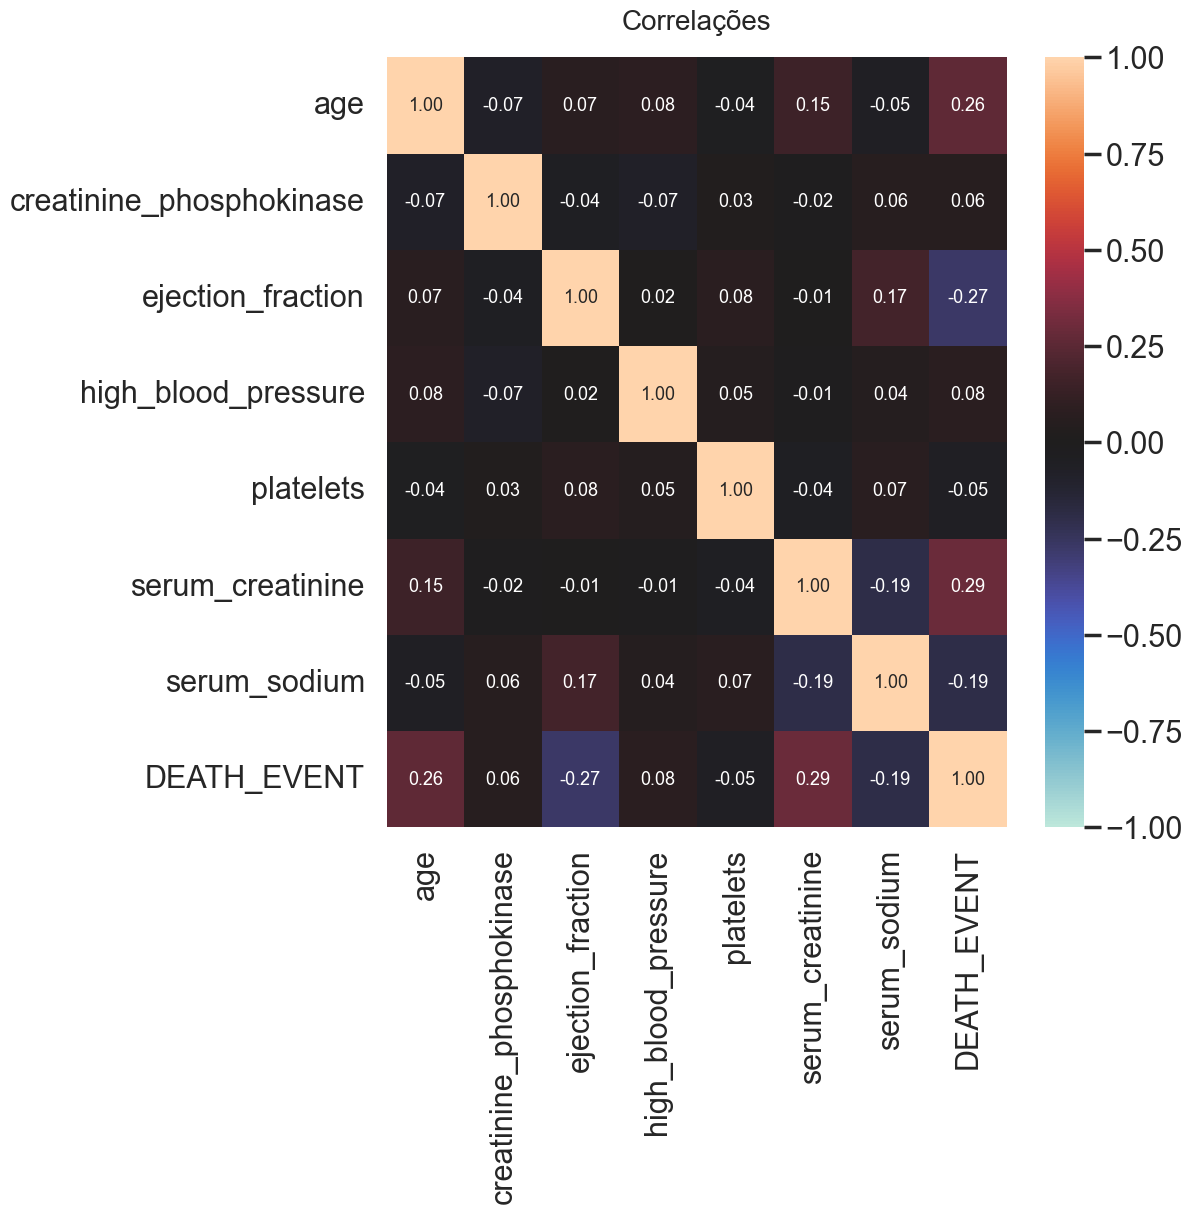

In [9]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,
                      annot=True, fmt='.2f', annot_kws={"size": 13}, cmap='icefire')
heatmap.set_title('Correlações', fontdict={'fontsize': 20},pad=20)
plt.show()

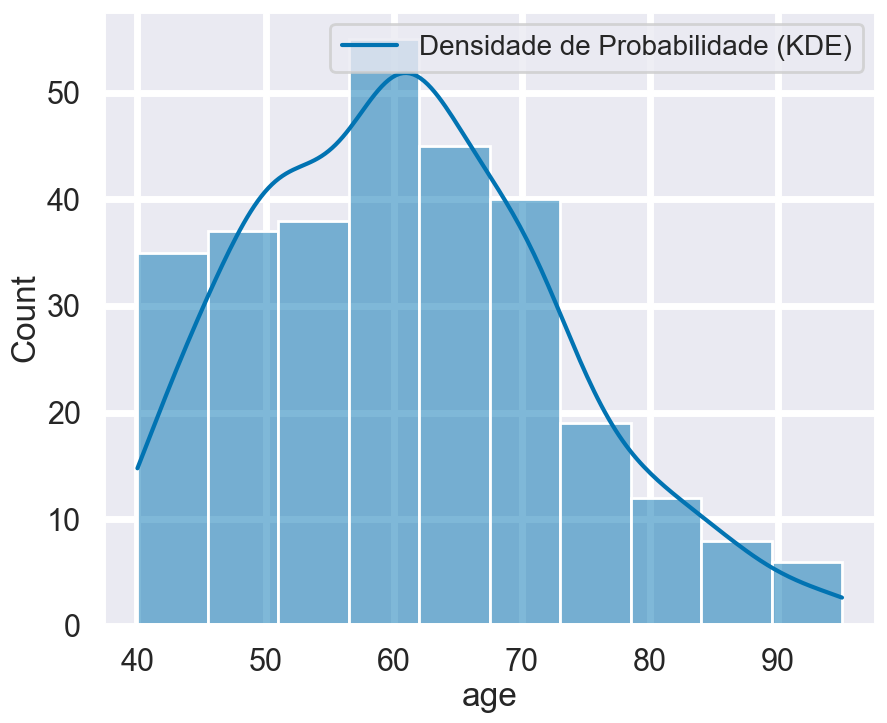

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=df, x="age", kde=True)
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})

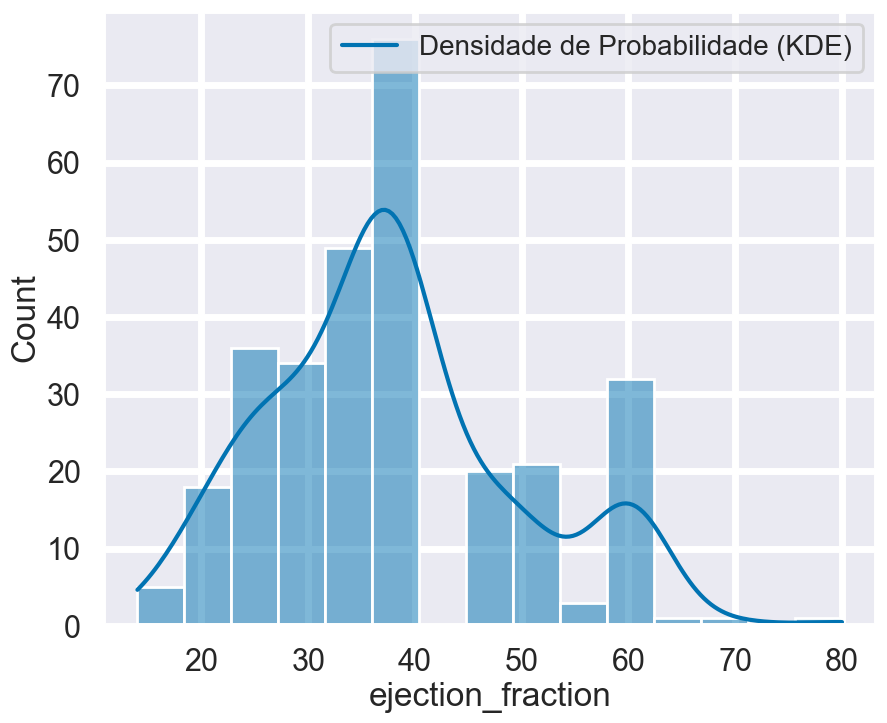

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=df, x="ejection_fraction", kde=True)
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})

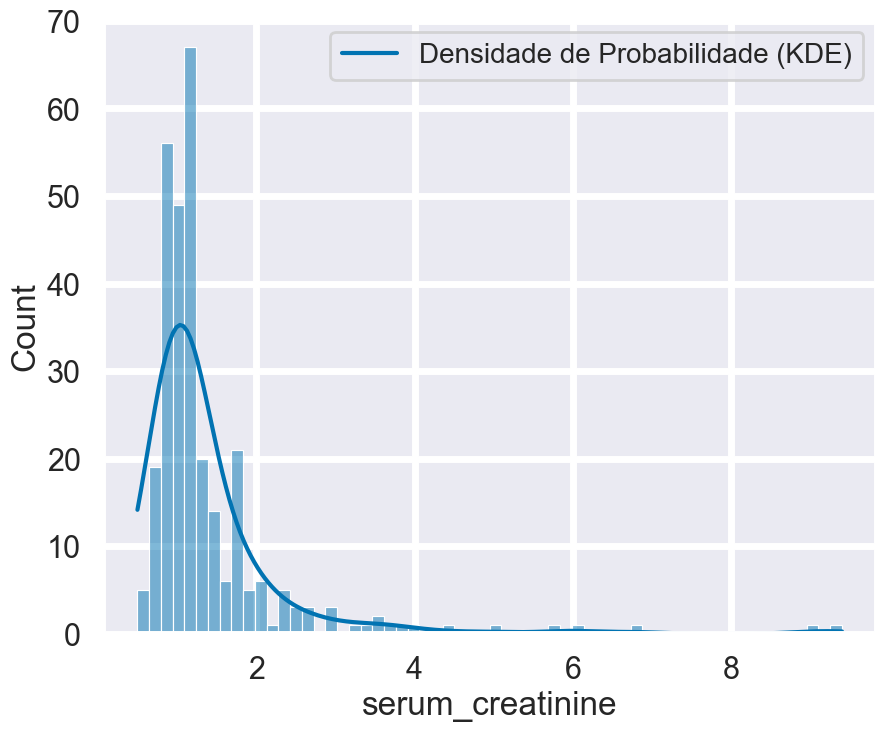

In [12]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=df, x="serum_creatinine", kde=True)
ax.legend(['Densidade de Probabilidade (KDE)'], prop={'size': 20})

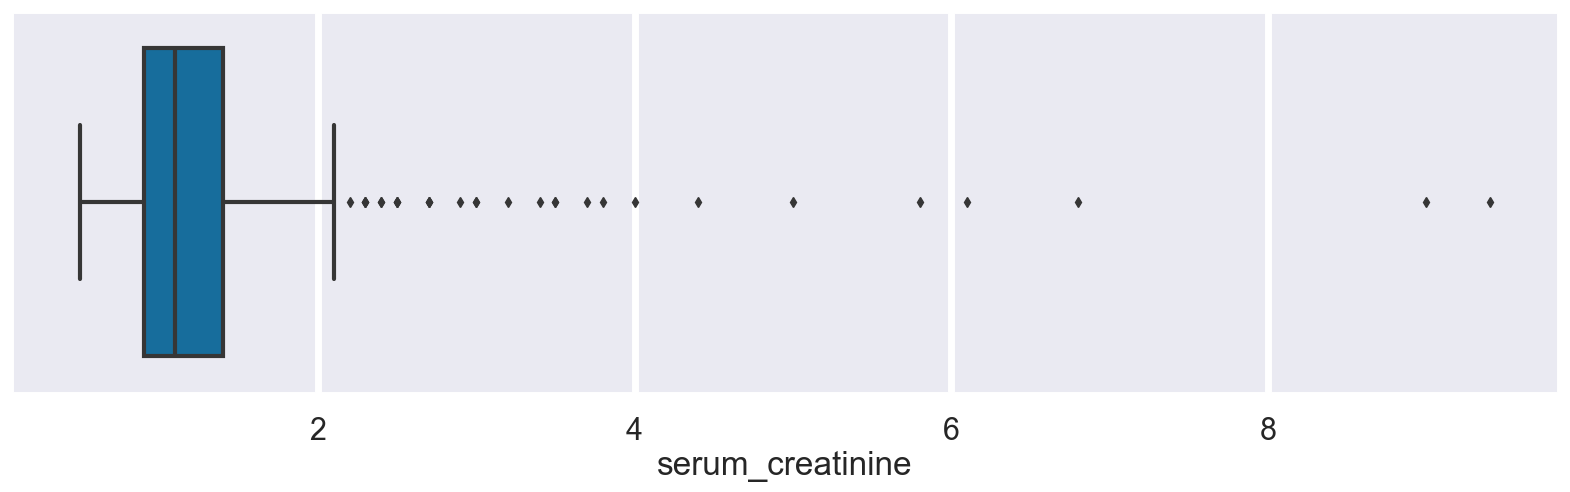

In [13]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data=df, x='serum_creatinine')
plt.show()

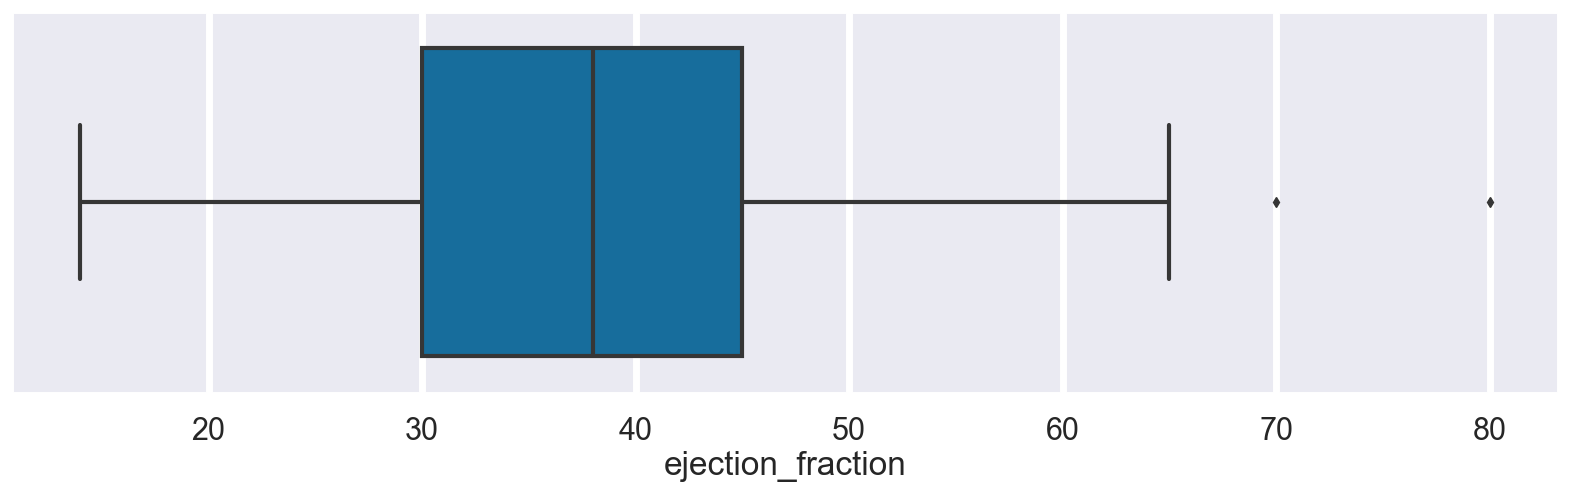

In [14]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data=df, x='ejection_fraction')
plt.show()

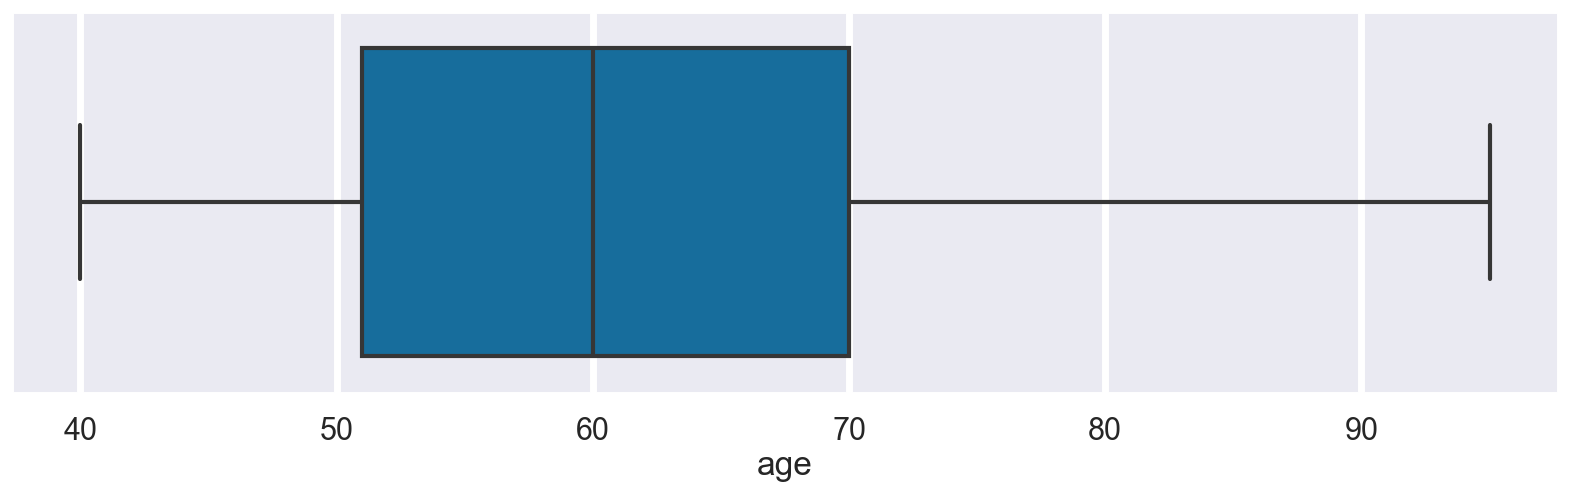

In [15]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data=df, x='age')
plt.show()

In [16]:
df.query(
    'serum_creatinine > 2.10')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,NaN,Yes,160.0000,Yes,20.0000,0.0000,327000.0000,2.7000,116.0000,Male,No,1
9,80.0000,Yes,123.0000,No,35.0000,1.0000,388000.0000,9.4000,133.0000,Female,Yes,1
10,75.0000,Yes,81.0000,No,38.0000,1.0000,368000.0000,4.0000,131.0000,Female,Yes,1
28,58.0000,Yes,60.0000,No,38.0000,0.0000,153000.0000,5.8000,134.0000,Female,No,1
31,85.0000,No,23.0000,No,45.0000,0.0000,360000.0000,3.0000,132.0000,Female,No,1
35,69.0000,No,582.0000,Yes,35.0000,0.0000,228000.0000,3.5000,134.0000,Female,No,1
38,60.0000,No,2656.0000,Yes,30.0000,0.0000,305000.0000,2.3000,137.0000,Female,No,0
39,60.0000,No,235.0000,Yes,38.0000,0.0000,329000.0000,3.0000,142.0000,Male,No,1
48,80.0000,Yes,553.0000,No,20.0000,1.0000,140000.0000,4.4000,133.0000,Female,No,1
52,60.0000,No,3964.0000,Yes,62.0000,0.0000,263358.0300,6.8000,146.0000,Male,No,1


In [17]:
df.query(
    'serum_creatinine > 2.10').count()

age                         28
anaemia                     29
creatinine_phosphokinase    29
diabetes                    28
ejection_fraction           28
high_blood_pressure         29
platelets                   29
serum_creatinine            29
serum_sodium                29
sex                         29
smoking                     29
DEATH_EVENT                 29
dtype: int64

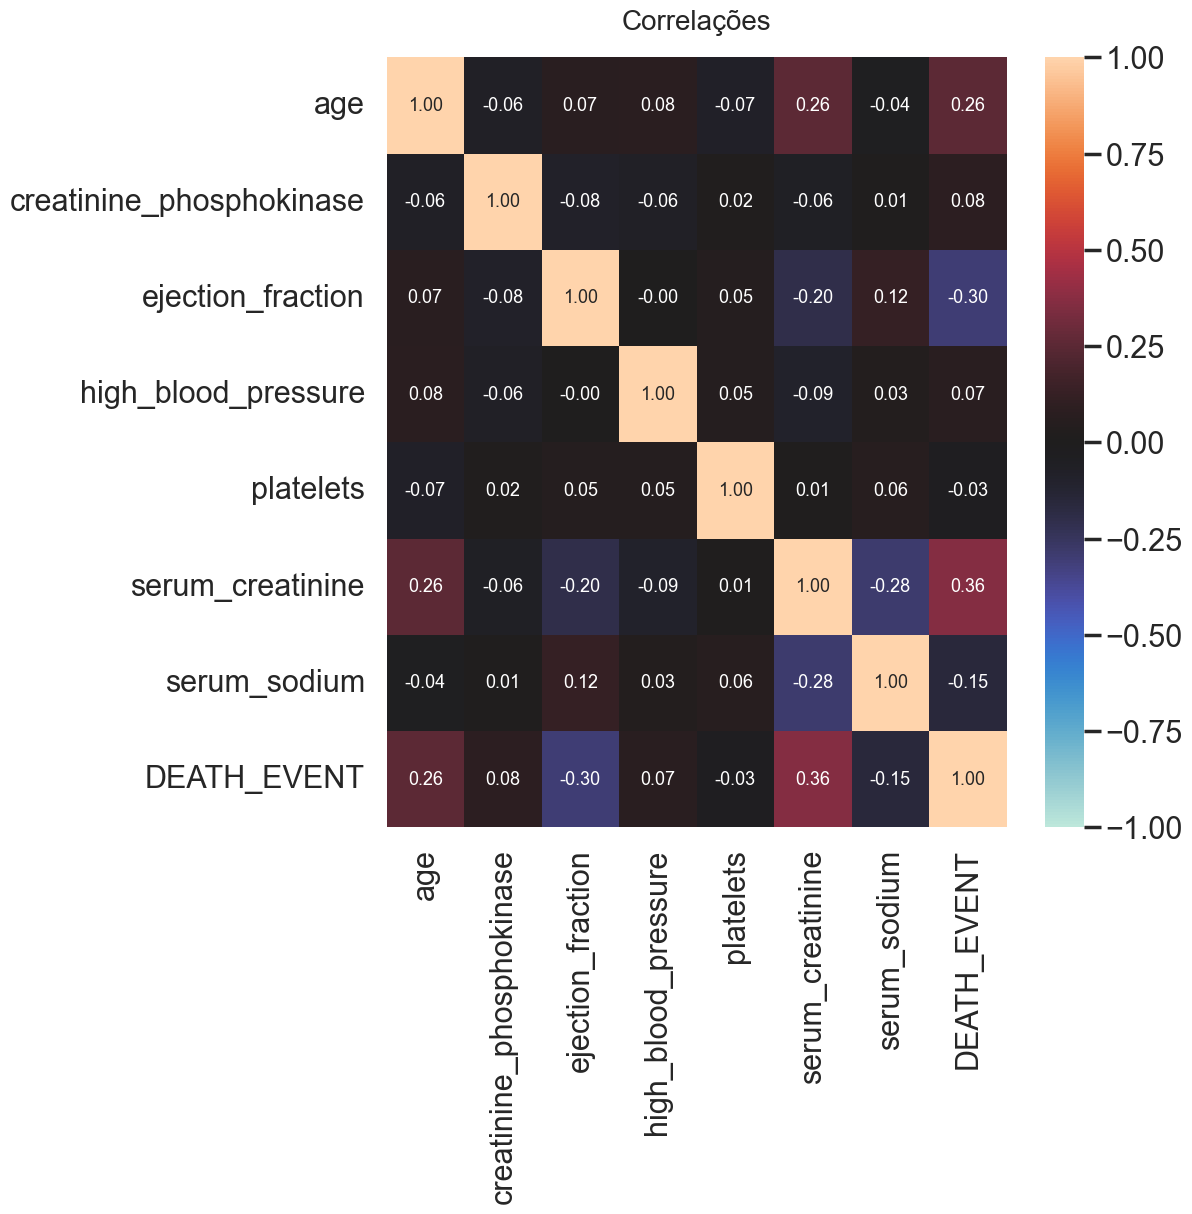

In [18]:
df.drop(df.query('serum_creatinine > 2.10').index, inplace=True)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,
                      annot=True, fmt='.2f', annot_kws={"size": 13}, cmap='icefire')
heatmap.set_title('Correlações', fontdict={'fontsize': 20},pad=20)
plt.show()

In [19]:
df.query(
    'age.isnull() | anaemia.isnull() | creatinine_phosphokinase.isnull() | diabetes.isnull() | ejection_fraction.isnull() | high_blood_pressure.isnull() | platelets.isnull() | serum_creatinine.isnull() | serum_sodium.isnull() | sex.isnull() | smoking.isnull()'  )

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
17,NaN,No,582.0000,No,14.0000,0.0000,166000.0000,0.8000,127.0000,Female,No,1
236,75.0000,No,119.0000,No,50.0000,1.0000,NaN,1.1000,148.0000,Female,No,0
244,54.0000,No,582.0000,Yes,38.0000,0.0000,264000.0000,1.8000,134.0000,NaN,No,0
253,70.0000,No,NaN,Yes,35.0000,1.0000,236000.0000,1.2000,132.0000,Male,No,0
254,53.0000,Yes,446.0000,No,NaN,1.0000,263358.0300,1.0000,139.0000,Female,No,0
259,53.0000,No,56.0000,No,50.0000,0.0000,308000.0000,NaN,135.0000,Female,Yes,0
260,55.0000,No,66.0000,No,40.0000,0.0000,203000.0000,1.0000,NaN,Female,No,0
261,62.0000,Yes,655.0000,No,40.0000,0.0000,283000.0000,0.7000,133.0000,NaN,No,0
262,65.0000,Yes,258.0000,Yes,25.0000,0.0000,198000.0000,1.4000,129.0000,NaN,No,1
273,42.0000,No,64.0000,No,40.0000,NaN,189000.0000,0.7000,140.0000,Female,No,0


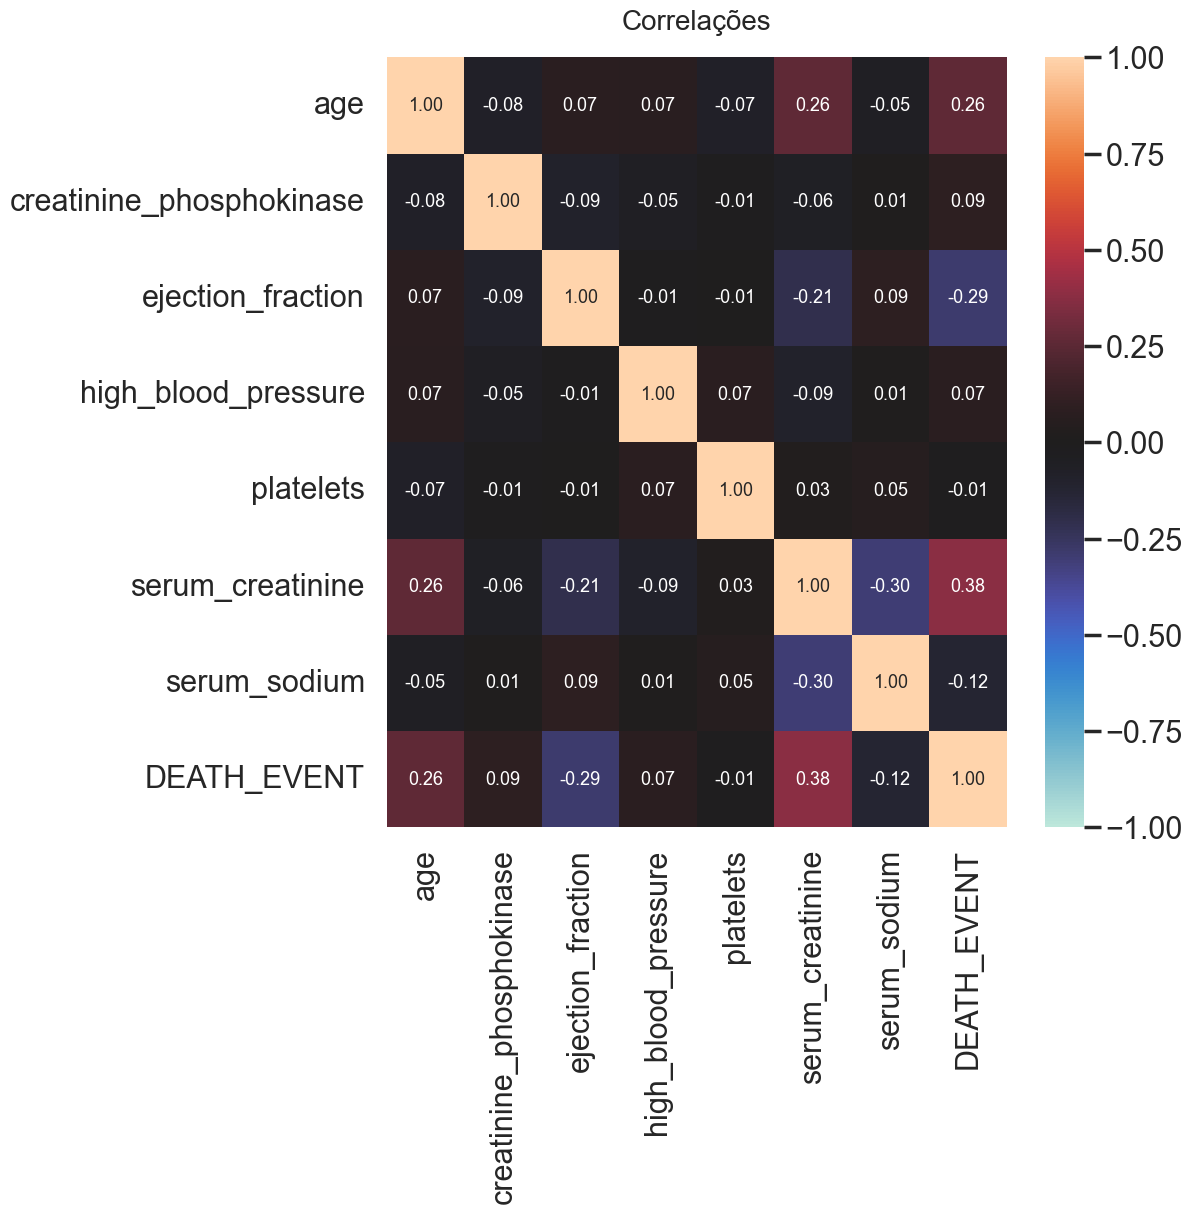

In [20]:
df.drop(df.query(
    'age.isnull() | anaemia.isnull() | creatinine_phosphokinase.isnull() | diabetes.isnull() | ejection_fraction.isnull() | high_blood_pressure.isnull() | platelets.isnull() | serum_creatinine.isnull() | serum_sodium.isnull() | sex.isnull() | smoking.isnull()'  ).index, inplace=True)
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,
                      annot=True, fmt='.2f', annot_kws={"size": 13}, cmap='icefire')
heatmap.set_title('Correlações', fontdict={'fontsize': 20},pad=20)
plt.show()

In [21]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       250 non-null    float64
 1   anaemia                   250 non-null    object 
 2   creatinine_phosphokinase  250 non-null    float64
 3   diabetes                  250 non-null    object 
 4   ejection_fraction         250 non-null    float64
 5   high_blood_pressure       250 non-null    float64
 6   platelets                 250 non-null    float64
 7   serum_creatinine          250 non-null    float64
 8   serum_sodium              250 non-null    float64
 9   sex                       250 non-null    object 
 10  smoking                   250 non-null    object 
 11  DEATH_EVENT               250 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 25.4+ KB
None


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0000,No,582.0000,No,20.0000,1.0000,265000.0000,1.9000,130.0000,Female,No,1
1,55.0000,No,7861.0000,No,38.0000,0.0000,263358.0300,1.1000,136.0000,Female,No,1
2,65.0000,No,146.0000,No,20.0000,0.0000,162000.0000,1.3000,129.0000,Female,Yes,1
3,50.0000,Yes,111.0000,No,20.0000,0.0000,210000.0000,1.9000,137.0000,Female,No,1
5,90.0000,Yes,47.0000,No,40.0000,1.0000,204000.0000,2.1000,132.0000,Female,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0000,No,582.0000,Yes,55.0000,0.0000,543000.0000,1.0000,132.0000,Male,No,0
289,90.0000,Yes,337.0000,No,38.0000,0.0000,390000.0000,0.9000,144.0000,Male,No,0
290,45.0000,No,615.0000,Yes,55.0000,0.0000,222000.0000,0.8000,141.0000,Male,No,0
293,63.0000,Yes,103.0000,Yes,35.0000,0.0000,179000.0000,0.9000,136.0000,Female,Yes,0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

### Awnsers
*   Do we need to split the data into train, valid and test? How? -> Since not many comparisons between models will be made and the data set is on the smaller side, the data set will be split in train and test only, not using a validation set. They are split into 75% training and 25% testing.
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split? -> Normalisation is a plus and, in this case, probably won't hurt. Because of that normalization will be made with the processing.normalize() function of sklearn. Different normalizations are required for train and test data.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [23]:
# Split data and normalize. You can use scikit-learn libraries.

serum_df = df.drop('DEATH_EVENT',
  axis='columns')

serum_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0000,No,582.0000,No,20.0000,1.0000,265000.0000,1.9000,130.0000,Female,No
1,55.0000,No,7861.0000,No,38.0000,0.0000,263358.0300,1.1000,136.0000,Female,No
2,65.0000,No,146.0000,No,20.0000,0.0000,162000.0000,1.3000,129.0000,Female,Yes
3,50.0000,Yes,111.0000,No,20.0000,0.0000,210000.0000,1.9000,137.0000,Female,No
5,90.0000,Yes,47.0000,No,40.0000,1.0000,204000.0000,2.1000,132.0000,Female,Yes
...,...,...,...,...,...,...,...,...,...,...,...
287,45.0000,No,582.0000,Yes,55.0000,0.0000,543000.0000,1.0000,132.0000,Male,No
289,90.0000,Yes,337.0000,No,38.0000,0.0000,390000.0000,0.9000,144.0000,Male,No
290,45.0000,No,615.0000,Yes,55.0000,0.0000,222000.0000,0.8000,141.0000,Male,No
293,63.0000,Yes,103.0000,Yes,35.0000,0.0000,179000.0000,0.9000,136.0000,Female,Yes


In [24]:
le_anaemia  = preprocessing.OrdinalEncoder()
le_diabetes = preprocessing.OrdinalEncoder()
le_sex      = preprocessing.OrdinalEncoder()
le_smoking  = preprocessing.OrdinalEncoder()


X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking']]
y = df['serum_creatinine']

X['anaemia']  = le_anaemia.fit_transform(X['anaemia'].values.reshape(-1, 1)).reshape(-1, 1)
X['diabetes'] = le_diabetes.fit_transform(X['diabetes'].values.reshape(-1, 1)).reshape(-1, 1)
X['sex']      = le_sex.fit_transform(X['sex'].values.reshape(-1, 1)).reshape(-1, 1)
X['smoking']  = le_smoking.fit_transform(X['smoking'].values.reshape(-1, 1)).reshape(-1, 1)

pd.DataFrame(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking
0,75.0000,0.0000,582.0000,0.0000,20.0000,1.0000,265000.0000,130.0000,0.0000,0.0000
1,55.0000,0.0000,7861.0000,0.0000,38.0000,0.0000,263358.0300,136.0000,0.0000,0.0000
2,65.0000,0.0000,146.0000,0.0000,20.0000,0.0000,162000.0000,129.0000,0.0000,1.0000
3,50.0000,1.0000,111.0000,0.0000,20.0000,0.0000,210000.0000,137.0000,0.0000,0.0000
5,90.0000,1.0000,47.0000,0.0000,40.0000,1.0000,204000.0000,132.0000,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...
287,45.0000,0.0000,582.0000,1.0000,55.0000,0.0000,543000.0000,132.0000,1.0000,0.0000
289,90.0000,1.0000,337.0000,0.0000,38.0000,0.0000,390000.0000,144.0000,1.0000,0.0000
290,45.0000,0.0000,615.0000,1.0000,55.0000,0.0000,222000.0000,141.0000,1.0000,0.0000
293,63.0000,1.0000,103.0000,1.0000,35.0000,0.0000,179000.0000,136.0000,0.0000,1.0000


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234)

# To use later
Y_test_best =  Y_test.copy()

Xtr_normalized = preprocessing.normalize(X_train, norm='max', axis=0)
Xte_normalized = preprocessing.normalize(X_test, norm='max', axis=0)

pd.DataFrame(Xtr_normalized)

,0,1,2,3,4,5,6,7,8,9
0,0.5579,0.0000,0.0249,0.0000,0.7500,0.0000,0.2588,0.9172,0.0000,1.0000
1,0.7263,0.0000,0.0740,0.0000,0.2500,0.0000,0.3129,0.9241,0.0000,1.0000
2,0.8316,1.0000,0.0070,0.0000,0.6250,1.0000,0.2024,0.9172,0.0000,0.0000
3,0.8211,1.0000,0.0081,0.0000,0.5000,0.0000,0.3259,0.9448,0.0000,1.0000
4,0.6000,1.0000,0.0164,0.0000,0.3750,0.0000,0.4647,0.9655,1.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
182,0.7368,0.0000,0.0118,0.0000,0.4375,0.0000,0.2176,0.9241,0.0000,1.0000
183,0.7368,0.0000,0.0205,0.0000,0.3125,0.0000,0.2871,0.9793,1.0000,0.0000
184,0.6316,0.0000,0.0740,1.0000,0.4750,1.0000,0.5306,0.9517,0.0000,1.0000
185,0.5789,1.0000,0.0229,0.0000,0.5625,0.0000,0.3098,0.9448,0.0000,1.0000


In [26]:
liR = LinearRegression()
liR.fit(Xtr_normalized, Y_train)
Y_pred = liR.predict(Xte_normalized)

mse = mean_squared_error(Y_test, Y_pred)
mse

0.09073231737533176

### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

### Awnsers

*   Do we need all the features to predict the target value? -> No, some features in the data set have low correlation with the target value. Because of that they can actually hurt performance.
*   What happens if we drop the low correlation features? -> They should be dropped.

In [27]:
# Feature selection.
from sklearn.feature_selection import mutual_info_regression, SelectKBest

fs = SelectKBest(score_func=mutual_info_regression, k=7)

fs.fit(Xtr_normalized, Y_train)

X_train_fs = fs.transform(Xtr_normalized)

X_test_fs = fs.transform(Xte_normalized)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

pd.DataFrame(X_test_fs)

Feature 0: 0.054662
Feature 1: 0.000000
Feature 2: 0.050188
Feature 3: 0.000000
Feature 4: 0.040981
Feature 5: 0.044895
Feature 6: 0.057387
Feature 7: 0.111786
Feature 8: 0.000000
Feature 9: 0.000000


,0,1,2,3,4,5,6
0,0.7579,0.0904,0.3846,0.0000,0.5046,0.9306,0.0000
1,0.5789,0.0257,0.5385,0.0000,0.4199,0.9375,1.0000
2,0.7368,0.2494,0.3077,1.0000,0.4850,0.9306,1.0000
3,0.9474,0.1444,0.5846,0.0000,0.7182,1.0000,0.0000
4,0.7684,0.5077,0.6154,1.0000,0.4052,0.9792,0.0000
...,...,...,...,...,...,...,...
58,0.5263,0.1050,0.6923,1.0000,0.5046,0.9236,0.0000
59,0.5789,0.0360,0.5846,0.0000,0.8306,0.9444,0.0000
60,0.6737,0.0266,0.9231,0.0000,0.5691,0.9375,0.0000
61,0.5474,0.0818,0.4615,1.0000,0.6151,0.9861,1.0000


In [28]:
liR = LinearRegression()
liR.fit(X_train_fs, Y_train)
Y_pred = liR.predict(X_test_fs)

mse = mean_squared_error(Y_test, Y_pred)
mse

0.08931009033412829

> What are the conclusions? (1-2 paragraphs)

### Conclusion

The mutual_info_regression is a great tool for feature selection, though it must be used with care. Since it has a random component, the effect of it on the performance may vary, sometimes making the model perform better, sometimes worse. 


An alternative to mutual_info_regression may be just verifying correlation manually between all the variables and the target and eliminating those near to 0.

paragrafo


2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [29]:
# TODO: MSE Loss. You cannot use scikit-learn!!
def MSE(y, y_pred):
  return np.mean((np.array(y) - np.array(y_pred)) ** 2)

In [30]:
# teste
(MSE([1,1,4], [1, 2, 3]), mean_squared_error([1,1,4], [1, 2, 3]))

(0.6666666666666666, 0.6666666666666666)

In [31]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class MyLinearRegression():
  def __init__(self, learning_rate=0.0001, max_iter=1000):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred


  def fit(self, X: np.array, y: np.array):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    error = []

    for i in range(self.max_iter):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum((y_pred - y))

      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db

      new_error = MSE(y, y_pred)
      error.append(new_error)

      if i > 2 and (error[i-1] <= new_error or error[i-2] <= new_error):
        print('converged in: ', i)
        return error
    
    return error


In [32]:
liR = MyLinearRegression()
liR.fit(Xtr_normalized, Y_train)
Y_pred = liR.predict(Xte_normalized)

mse = MSE(Y_test, Y_pred)
mse

0.7331093348660426

In [33]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor

liR = SGDRegressor()
liR.fit(Xtr_normalized, Y_train)
Y_pred = liR.predict(Xte_normalized)

mse = MSE(Y_test, Y_pred)
mse

0.13461738148354607

> What are the conclusions? (1-2 paragraphs)

### Conclusion

The SGDRegressor from sklearn perform better than the simple Regressor (```MyLinearRegression()```) implemented by hand. This happens because SGDRgressor has, by default, a variable learning rate, that makes it possible for the model to converge better in the same amount of iterations and is overall more feature rich.

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

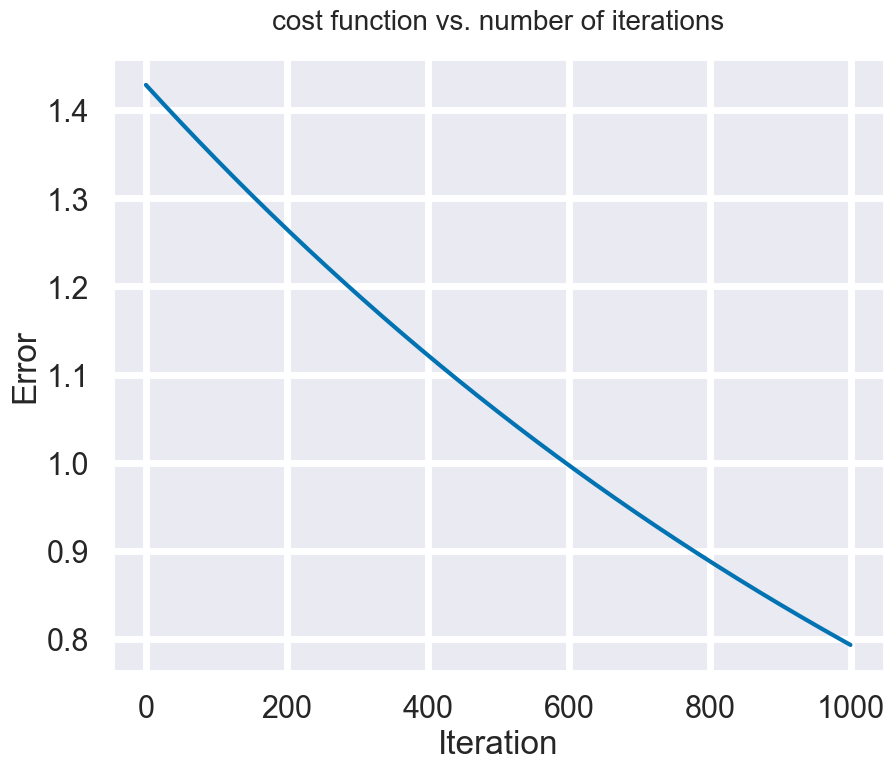

In [34]:
# TODO: Plot the cost function vs. number of iterations in the training set.
liR = MyLinearRegression()
error = liR.fit(Xtr_normalized, Y_train)
plt.figure(figsize=(10, 8))
ax = sns.lineplot(error)
ax.set_title('cost function vs. number of iterations', fontdict={'fontsize': 20},pad=20)
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
plt.show()

> What are the conclusions? (1-2 paragraphs)

### Conclusions

It's possible to see the problems discussed in the last section, the slow convergence of the algorithm due to non optimal learning rate. It is possible that more iterations would make the performance better, but the optimal way to adjust would be the learning rate, or to implement a variable learning rate in the algorithm.

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [35]:
# TODO: Different learning rates. You can use scikit-learn libraries.
from sklearn.model_selection import GridSearchCV

liR = SGDRegressor()

parameters = {'learning_rate': ['constant'], 'eta0': [0.1, 0.01, 0.001, 0.0001]}

gs = GridSearchCV(liR, parameters, scoring='neg_mean_squared_error')

gs.fit(Xtr_normalized, Y_train)

pd.DataFrame(gs.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.0000,0.0000,0.0003,0.0004,0.0100,constant,"{'eta0': 0.01, 'learning_rate': 'constant'}",-0.1413,-0.1067,-0.1030,-0.1292,-0.1257,-0.1212,0.0144,1
2,0.0006,0.0005,0.0001,0.0002,0.0010,constant,"{'eta0': 0.001, 'learning_rate': 'constant'}",-0.1448,-0.1148,-0.1120,-0.1418,-0.1539,-0.1335,0.0169,2
0,0.0011,0.0002,0.0000,0.0000,0.1000,constant,"{'eta0': 0.1, 'learning_rate': 'constant'}",-0.1488,-0.1728,-0.1177,-0.1273,-0.1103,-0.1354,0.0228,3
3,0.0001,0.0002,0.0004,0.0005,0.0001,constant,"{'eta0': 0.0001, 'learning_rate': 'constant'}",-0.1696,-0.1277,-0.1199,-0.1637,-0.1652,-0.1492,0.0210,4


In [36]:
Y_pred_best = gs.predict(Xte_normalized)

mse = MSE(Y_test, Y_pred_best)
mse

0.11270003999160615

> What are the conclusions? (1-2 paragraphs)

### Conclusions

Here the grid search method was used to find, between a list of parameters, which one performs better. Note that the grid search function on sklearn uses cross validation to ensure data tightness.


We can observe that only the optimisation of a fixed learning rate is enough to surpass the performance seen previously with a variable, but unoptimized, learning hate. This shows the importance of parameter optimization in training machine learning models. 

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [37]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures


poly2 = PolynomialFeatures(2)
X_poly2 = poly2.fit_transform(X)

poly_X_train2, poly_X_test2, Y_train, Y_test = train_test_split(
    X_poly2, y, test_size=0.25, random_state=1234)

poly_Xtr_normalized2 = preprocessing.normalize(poly_X_train2, norm='max', axis=0)
poly_Xte_normalized2 = preprocessing.normalize(poly_X_test2, norm='max', axis=0)


liR = LinearRegression()
liR.fit(poly_Xtr_normalized2, Y_train)
Y_pred = liR.predict(poly_Xte_normalized2)

mse = MSE(Y_test, Y_pred)
mse

1.4911978562127977

In [38]:
poly3 = PolynomialFeatures(3)
X_poly3 = poly3.fit_transform(X)

poly_X_train3, poly_X_test3, Y_train, Y_test = train_test_split(
    X_poly3, y, test_size=0.25, random_state=1234)

poly_Xtr_normalized3 = preprocessing.normalize(poly_X_train3, norm='max', axis=0)
poly_Xte_normalized3 = preprocessing.normalize(poly_X_test3, norm='max', axis=0)


liR = LinearRegression()
liR.fit(poly_Xtr_normalized3, Y_train)
Y_pred = liR.predict(poly_Xte_normalized3)

mse = MSE(Y_test, Y_pred)
mse

666.4852031494509

In [39]:
poly4 = PolynomialFeatures(4)
X_poly4 = poly4.fit_transform(X)

poly_X_train4, poly_X_test4, Y_train, Y_test = train_test_split(
    X_poly4, y, test_size=0.25, random_state=1234)

poly_Xtr_normalized4 = preprocessing.normalize(poly_X_train4, norm='max', axis=0)
poly_Xte_normalized4 = preprocessing.normalize(poly_X_test4, norm='max', axis=0)


liR = LinearRegression()
liR.fit(poly_Xtr_normalized4, Y_train)
Y_pred = liR.predict(poly_Xte_normalized4)

mse = MSE(Y_test, Y_pred)
mse

14.10955954786816

> What are the conclusions? (1-2 paragraphs)

### Conclusions

Here we can see that the polynomial strategy is not effective in this case, it worsened the error in all cases.

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

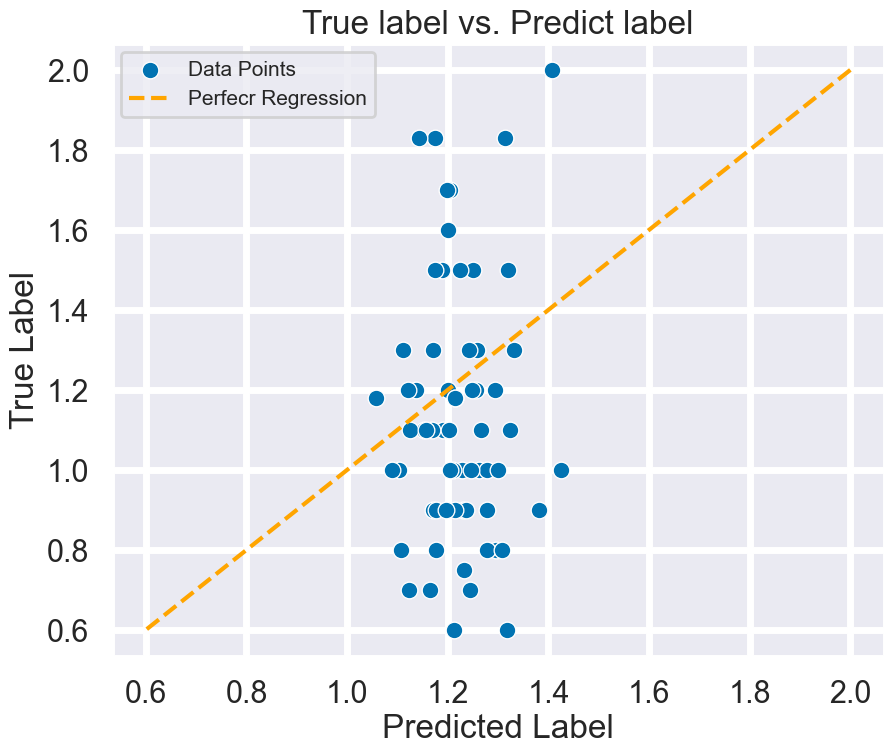

In [40]:
# TODO: Plot the true label and the predict label
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=pd.DataFrame({'pred': Y_pred_best, 'test': Y_test_best}), x='pred', y='test')
ax.set_title('True label vs. Predict label')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
p1 = max(max(Y_pred_best), max(Y_test_best))
p2 = min(min(Y_pred_best), min(Y_test_best))
plt.plot([p1, p2], [p1, p2], 'orange', linestyle='dashed')
plt.legend(('Data Points', 'Perfecr Regression'), fontsize=15)
plt.show()

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

### Awnsers

*   Do we need to split the data into train, valid and test? How? -> Yes, data will be divided in the same way as the linear regression portion of the assignment. 
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split? -> Yes, data will be normalized in the same way as the linear regression portion of the assignment. 

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [41]:
from sklearn.feature_selection import mutual_info_classif
# TODO: Feature selection

le_anaemia  = preprocessing.OrdinalEncoder()
le_diabetes = preprocessing.OrdinalEncoder()
le_sex      = preprocessing.OrdinalEncoder()
le_smoking  = preprocessing.OrdinalEncoder()


X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking', 'serum_creatinine']]
y = df['DEATH_EVENT']

X['anaemia']  = le_anaemia.fit_transform(X['anaemia'].values.reshape(-1, 1)).reshape(-1, 1)
X['diabetes'] = le_diabetes.fit_transform(X['diabetes'].values.reshape(-1, 1)).reshape(-1, 1)
X['sex']      = le_sex.fit_transform(X['sex'].values.reshape(-1, 1)).reshape(-1, 1)
X['smoking']  = le_smoking.fit_transform(X['smoking'].values.reshape(-1, 1)).reshape(-1, 1)

pd.DataFrame(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,serum_creatinine
0,75.0000,0.0000,582.0000,0.0000,20.0000,1.0000,265000.0000,130.0000,0.0000,0.0000,1.9000
1,55.0000,0.0000,7861.0000,0.0000,38.0000,0.0000,263358.0300,136.0000,0.0000,0.0000,1.1000
2,65.0000,0.0000,146.0000,0.0000,20.0000,0.0000,162000.0000,129.0000,0.0000,1.0000,1.3000
3,50.0000,1.0000,111.0000,0.0000,20.0000,0.0000,210000.0000,137.0000,0.0000,0.0000,1.9000
5,90.0000,1.0000,47.0000,0.0000,40.0000,1.0000,204000.0000,132.0000,0.0000,1.0000,2.1000
...,...,...,...,...,...,...,...,...,...,...,...
287,45.0000,0.0000,582.0000,1.0000,55.0000,0.0000,543000.0000,132.0000,1.0000,0.0000,1.0000
289,90.0000,1.0000,337.0000,0.0000,38.0000,0.0000,390000.0000,144.0000,1.0000,0.0000,0.9000
290,45.0000,0.0000,615.0000,1.0000,55.0000,0.0000,222000.0000,141.0000,1.0000,0.0000,0.8000
293,63.0000,1.0000,103.0000,1.0000,35.0000,0.0000,179000.0000,136.0000,0.0000,1.0000,0.9000


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234)

Xtr_normalized = preprocessing.normalize(X_train, norm='max', axis=0)
Xte_normalized = preprocessing.normalize(X_test, norm='max', axis=0)

In [43]:
fs = SelectKBest(score_func=mutual_info_classif, k=7)

fs.fit(Xtr_normalized, Y_train)

X_train_fs = fs.transform(Xtr_normalized)

X_test_fs = fs.transform(Xte_normalized)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

pd.DataFrame(X_test_fs)

Feature 0: 0.104802
Feature 1: 0.000000
Feature 2: 0.020765
Feature 3: 0.016968
Feature 4: 0.088524
Feature 5: 0.020932
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.001401
Feature 9: 0.000000
Feature 10: 0.071662


,0,1,2,3,4,5,6
0,0.7579,0.0904,0.0000,0.3846,0.0000,1.0000,0.6000
1,0.5789,0.0257,0.0000,0.5385,0.0000,0.0000,0.6000
2,0.7368,0.2494,0.0000,0.3077,1.0000,0.0000,0.9150
3,0.9474,0.1444,0.0000,0.5846,0.0000,1.0000,0.4500
4,0.7684,0.5077,0.0000,0.6154,1.0000,1.0000,0.4500
...,...,...,...,...,...,...,...
58,0.5263,0.1050,0.0000,0.6923,1.0000,0.0000,0.5000
59,0.5789,0.0360,1.0000,0.5846,0.0000,1.0000,0.6500
60,0.6737,0.0266,0.0000,0.9231,0.0000,1.0000,0.7500
61,0.5474,0.0818,1.0000,0.4615,1.0000,0.0000,0.5000


> What are the conclusions? (1-2 paragraphs)

### Conclusion

Results here are analogous to the linear regression experiment.

2. (2 points) Perform Multinomial Logistic Regression.

In [44]:
# TODO: Logistic Regression. You can use scikit-learn libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

loR = LogisticRegression()
loR.fit(X_train_fs, Y_train)
Y_pred = loR.predict(X_test_fs)

f1 = f1_score(Y_test, Y_pred)
f1

0.3

> What are the conclusions? (1-2 paragraphs)


### Coonclusions

Model runs great here, but there isn't much reference to compare against.

3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

### Awnsers 

*   The dataset is balanced ? -> No it is not, there are more than half death events than non death events.
*   In this case, which technique is better: *oversampling* or *undersampling*? -> Since there isn't much data in the data set we don't have the luxury of undersampling, and that's why it is what we should use. 

In [45]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.
groupBy_sex = df.groupby('DEATH_EVENT')
groupBy_sex.count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
DEATH_EVENT,,,,,,,,,,,
0,174,174,174,174,174,174,174,174,174,174,174
1,76,76,76,76,76,76,76,76,76,76,76


In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1234)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_Ros, Y_ros = ros.fit_resample(X_train, Y_train)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_Ros, Y_ros, test_size=0.2, random_state=1234)

Xtr_normalized = preprocessing.normalize(X_train, norm='max', axis=0)
Xva_normalized = preprocessing.normalize(X_val, norm='max', axis=0)
Xte_normalized = preprocessing.normalize(X_test, norm='max', axis=0)

loR = LogisticRegression()
loR.fit(Xtr_normalized, Y_train)
Y_pred = loR.predict(Xva_normalized)

f1 = f1_score(Y_val, Y_pred)
print('Val f1: ', f1)

Y_pred = loR.predict(Xte_normalized)

f1 = f1_score(Y_test, Y_pred)
print('test f1: ', f1)

Val f1:  0.6222222222222222
test f1:  0.5142857142857143


In [47]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1234)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_Rus, Y_rus = rus.fit_resample(X_train, Y_train)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_Rus, Y_rus, test_size=0.2, random_state=1234)

Xtr_normalized = preprocessing.normalize(X_train, norm='max', axis=0)
Xva_normalized = preprocessing.normalize(X_val, norm='max', axis=0)
Xte_normalized = preprocessing.normalize(X_test, norm='max', axis=0)

loR = LogisticRegression()
loR.fit(Xtr_normalized, Y_train)
Y_pred = loR.predict(Xva_normalized)

f1 = f1_score(Y_val, Y_pred)
print('Val f1: ', f1)

Y_pred = loR.predict(Xte_normalized)

f1 = f1_score(Y_test, Y_pred)
print('test f1: ', f1)

Val f1:  0.7407407407407408
test f1:  0.5


> What are the conclusions? (1-2 paragraphs)

### Conclusion

It is important to note that, even though oversampling gave better results, it is of extreme importance to check with a field specialist if the generated samples do make sense in the given context. Generating new examples artificially always carry a risk of creating impossible, or improbable examples compared with real life which can affect performance of the algorithm when deployed.

That's why here there was a need to use a validation set. By preserving the original data and only sampling with train and val sets we can see that, even though the under sampling result is better in validation, when we check with the test data the over sampling method is revealed better. 

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [48]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.
from sklearn.metrics import accuracy_score, precision_score, recall_score
ros = RandomOverSampler(random_state=1234)
X_Ros, Y_ros = ros.fit_resample(X, y)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_Ros, Y_ros, test_size=0.25, random_state=1234)

Xtr_normalized = preprocessing.normalize(X_train, norm='max', axis=0)
Xte_normalized = preprocessing.normalize(X_test, norm='max', axis=0)

loR = LogisticRegression()
loR.fit(Xtr_normalized, Y_train)
Y_pred = loR.predict(Xte_normalized)

f1 = f1_score(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
print('F1: ', f1, ' Accuracy: ', acc, ' Precision: ', pre, ' Recall: ', rec)

F1:  0.7631578947368421  Accuracy:  0.7931034482758621  Precision:  0.7073170731707317  Recall:  0.8285714285714286


<Figure size 1000x800 with 0 Axes>

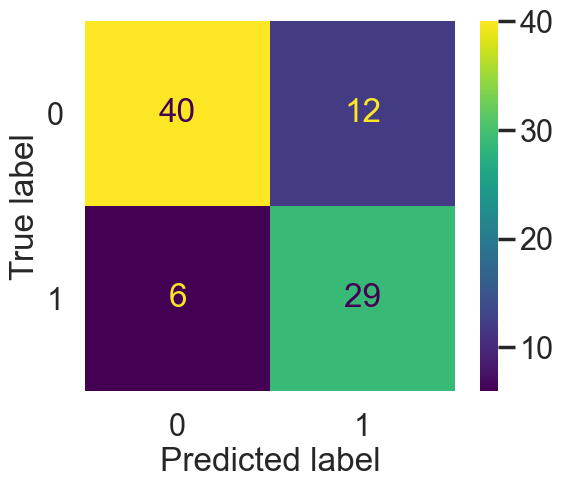

In [49]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(Y_test, Y_pred)

sns.set_context("poster", font_scale=1, rc={
                "grid.linewidth": 0, "axes.linewidth": 0})

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=loR.classes_)
disp.plot()


> What are the conclusions? (1-2 paragraphs)

# Conclusion

Here we can see that the model is fairly accurate, having a score of 79%. Precision is not bad at 71% and the recall is good, with a score of 83%. Confusion matrices are a valuable tool when evaluating binary classification models since it presents all 3 metrics in one place.

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**